In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [4]:
def show_bins(data):
    bins = np.arange(data.min(), data.max() + 1, 1)
    plt.hist(data[0, :], bins=bins)
    plt.show()


eb52071a908ad0dccbd9e819030489e2d254f1e24e98b09337f855cc798d
1 ####################################################################################################
eb52071a900a4b806722e819030489e2d254f1e24e98b09337f87dd1d9ec
2 ####################################################################################################
eb52071a900a4b806722e819030489e2d254f1e24e98b09337f87dd1d9ec
3 ####################################################################################################
eb52071ad00e26d054cee819030489e2d254f1e24e98b09337f87c65f94a
4 ####################################################################################################
eb52071ad00e26d054cee819030489e2d254f1e24e98b09337f87c65f94a
5 ####################################################################################################
eb52071ad08dbda87835e819030489e2d254f1e24e98b09337f8fc5db82b
6 ####################################################################################################
eb52071ad08dbda8

eb52071af0977fbe7dffdd2a43954d5fb046439a4f98b19337fc2ddfeffd
96 ####################################################################################################
eb52071a10104d1e0001dd2a43954d5fb046429a4e98b09337fc2d48ebd1
97 ####################################################################################################
eb52071ab09effff6ffddd2a43954d5fb046429a4e98b09337fc2ddbeff4
98 ####################################################################################################
eb52071ab01024ff0000dd2a43954d5fb046429a4e98b09337fc2bd3e664
99 ####################################################################################################
[[22 20 19 20 20 22 20 20 21 19 21 21 19 19 21 19  0  0  0  0  1 15 22 20
  21 22 14  0  0  0  0  0 17 18 19 18 21 18 18 21 21 23 12  1  1  1  1  1
  20 20 20 20 22  8  0  0  0  0  5 21 21 19 18 18  1  0  0  1  0  0  1  1
   1  0  6 19 20 19 18 18  0  0  0  0  0  0  1  1  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  1  0  0  0  0  1  1  0 

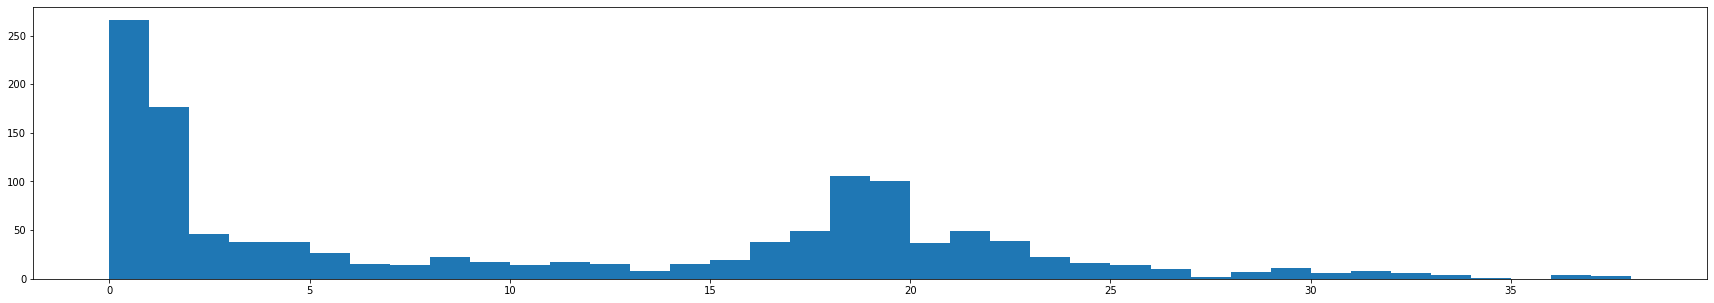

[[19 21 19  0 21  0 19 21  1 20  0 19  0  1 19  0  1  0  0  0  0 17 20 21
   1  1  0 22 22  2 20  1 17 29  9 21  0  0  0  1 30  0  0 18 29  5  3 28
   6  3 22  6  5 19  8  8 33  6 34  9 11  7  5 20  1 29  7  1 31 28 34 36
   8 31  8  8 28  1 25  5 16 16  1 16 17 16  0 17  0  0 16  1 16  1 16  0
   0 17  1  0  1  1 17 18 16  0  1 24  0 18  1 19  1 25  0  2 18 18  2 23
   0 18  0 22 19 18 20 17 17  0 20 17  1  1  1  2  2 18  1  1  0 23 22  0
   0 19  0  0  1  0 24  0 25  0  2 23 18  1 17  0  1 17  1  1 18 19 18  0
  19  0  1 18 19  1  0  1 18  1 19 19  0  0  1  1 19  1  0 21  1  1 19 20
   1  0 19 18  1 17 18 22 19 19 20 21 21 20  1  1 15 18 16  2 14  3 25 19
  24  5 25  7  1  1  4  4  8  7 21  0 23 24 19  1 24 19  7  6  0  3 21  0]]


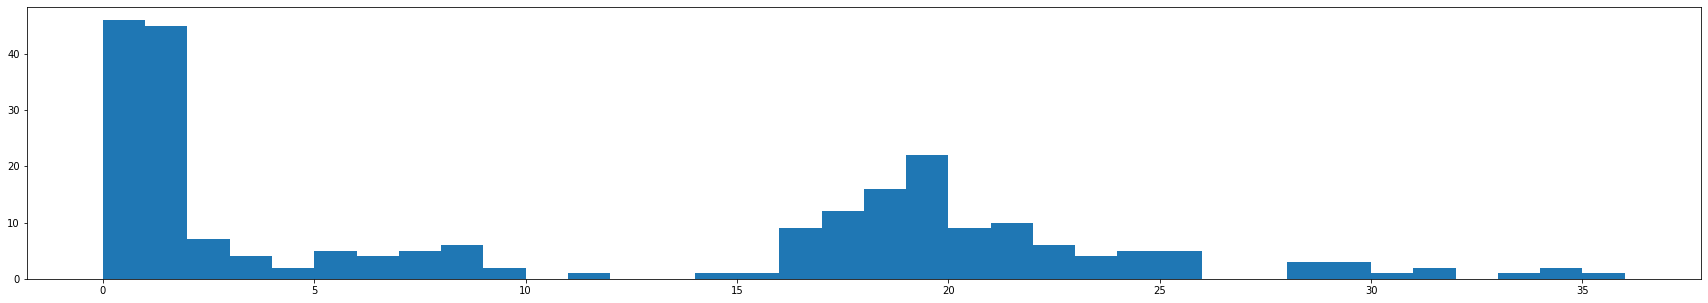

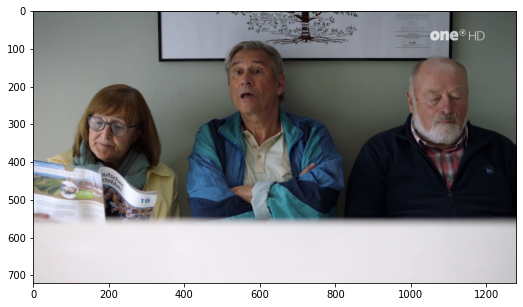

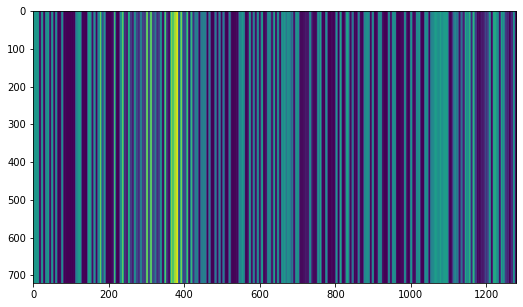

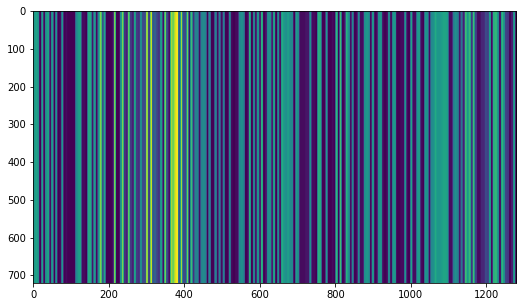

eb52071af09dbfff6ffbdd2a43954d5fb046429a4e98b09337fcebf3eef2
100 ####################################################################################################
eb52071a9098042f4200dd2a43954d5fb046429a4e98b09337fce3a0aec2
101 ####################################################################################################
eb52071af09b3fbf7ffedd2a43954d5fb046429a4e98b09337fce7fceff7
102 ####################################################################################################
eb52071a101a120b0200dd2a43954d5fb046429a4e98b09337fce7c4ca46
103 ####################################################################################################
eb52071ab09bbfdf7fffdd2a43954d5fb046429a4e98b09337fc6be6ea6f
104 ####################################################################################################
eb52071a101b00070020dd2a43954d5fb046429a4e98b09337fc6040420e
105 ####################################################################################################
eb52

eb52071a109e49d7fca7827f82270098167197124e98b09337f0dadb0f3f
184 ####################################################################################################
eb52071a109e49d7fca7827f82270098167197124e98b09337f0dadb0f3f
185 ####################################################################################################
eb52071a301fd28fd05d827f82270098167197124e98b09337f0d2e6e44e
186 ####################################################################################################
eb52071a301fd28fd05d827f82270098167197124e98b09337f0d2e6e44e
187 ####################################################################################################
eb52071a50a1d47afcd1827f82270098167197124e98b09337f09b3af8e7
188 ####################################################################################################
eb52071a50a1d47afcd1827f82270098167197124e98b09337f09b3af8e7
189 ####################################################################################################
eb52

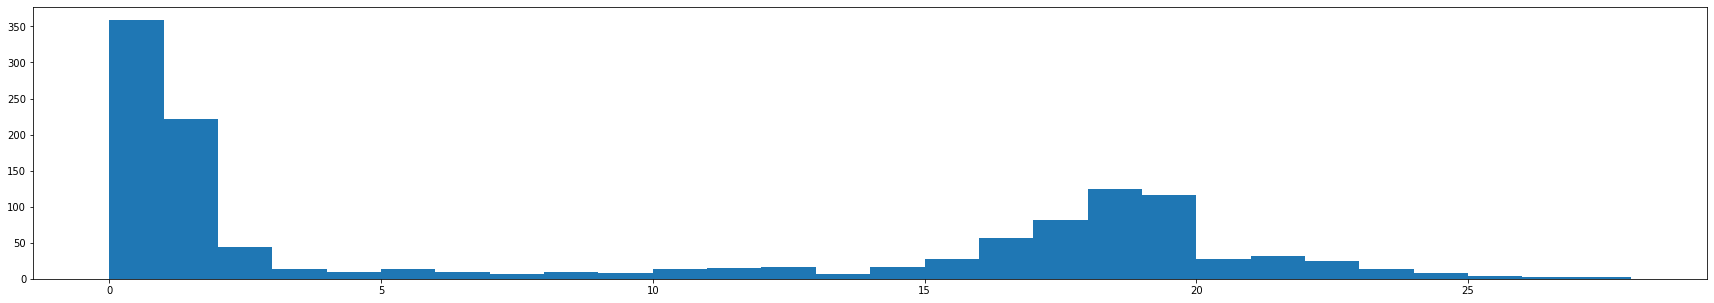

[[19 22 22  1 20  1 19 19  0 20  1 18  1  0 20  0  0  0  0  1  0 19 19 18
   1  1  0 18 19  0 18  1  0  0  1 19  0  0  1  0 17  1 19  0 19  1  0  0
   0 21 19  0  0  1 21 20 19 19 21  2 17  0  5 17  1  1 12  1 18  0  2  2
  16 17 16  0  2 14  1 16 15  1  1  1  0  0 17  1  1 16 16 23 18 18 16 16
  16  0  1  1  1  1 16  0  0  0 20  2  0 16 18 17  1  0  0  0  1  0  1  1
  18  1  0 18 19  1  0  0  3  3  3 19  1 19 15  2  1 19 25 20  1  1  1 17
  23  0  1 16  0 18 22 19  0  0  2 20  1  0 18  1  1 18  1  0 19 18 17  0
  18  1  1 19 18  0  0  0 19  1 18 18  0  0  0  0 18  0  0 18  1  0 18 18
   1  0 19 19  1 18 18 19 19 18 19 19  0  0  2  1 10  1 15 20 10 16 13  0
   0 19 19 18  2 18  0 16 15  0 19 19 12 15 20  1 17 17 18  1 17 17  0  0]]


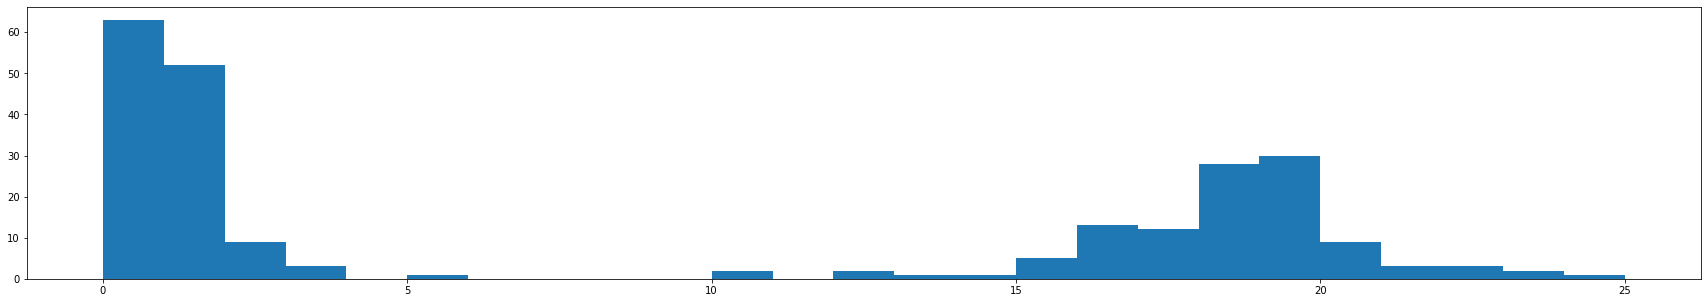

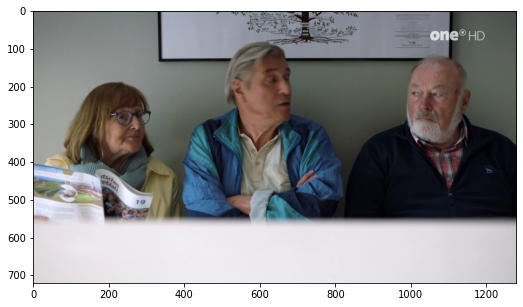

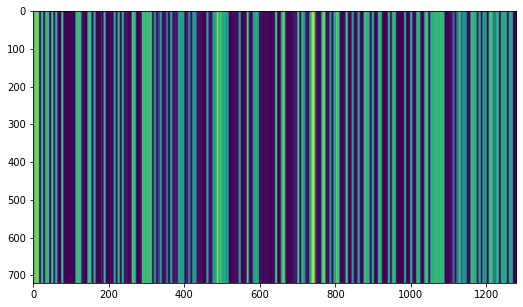

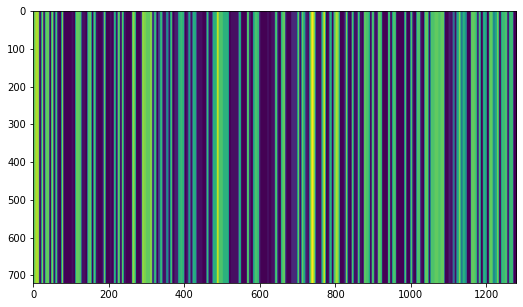

eb52071a10a863eb28e5827f82270098167197124e98b09337f0be75beec
200 ####################################################################################################
eb52071a10a863eb28e5827f82270098167197124e98b09337f0be75beec
201 ####################################################################################################
eb52071a3029f8bf041e827f82270098167197124e98b09337f0b648559d
202 ####################################################################################################
eb52071a3029f8bf041e827f82270098167197124e98b09337f0b648559d
203 ####################################################################################################
eb52071a50aace0f5de8827f82270098167197124e98b09337f0707a93ef
204 ####################################################################################################
eb52071a50aace0f5de8827f82270098167197124e98b09337f0707a93ef
205 ####################################################################################################
eb52

eb52071ab0840a3dac193cd40943bb175a1e3c024e98b0d337e8914d2b17
279 ####################################################################################################
eb52071ad086916580fe3cd40143bb175a1e3c024e98b0d337e8d33ee375
280 ####################################################################################################
eb52071ad086916580fe3cd40143bb175a1e3c024e98b0d337e8d33ee375
281 ####################################################################################################
eb52071ab086a799d90d3cd40143bb175a1e3c024e98b0d337e8df42077d
282 ####################################################################################################
eb52071ab086a799d90d3cd40143bb175a1e3c024e98b0d337e8df42077d
283 ####################################################################################################
eb52071a10073c85f5f73cd401439b175a1e3c024e98b0d337e8d2dc8e6d
284 ####################################################################################################
eb52

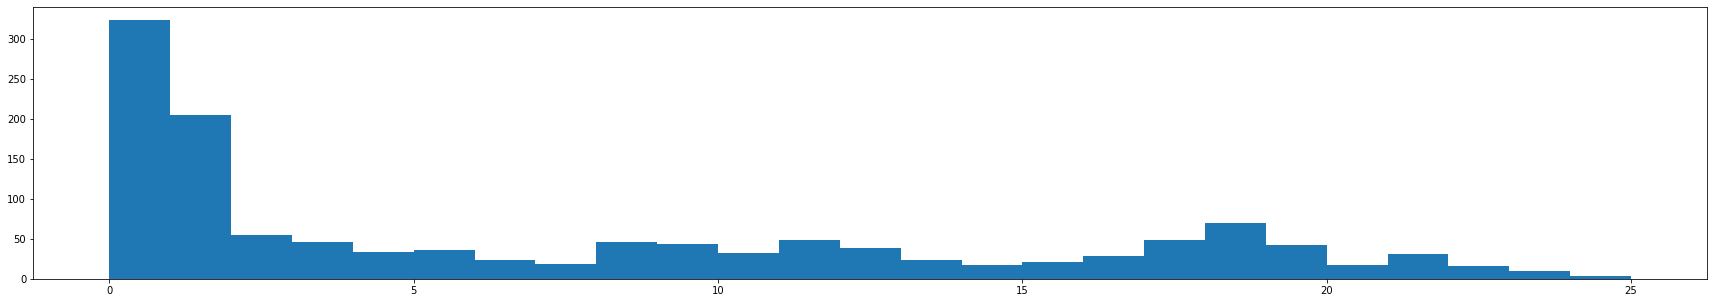

[[23 20 21  1 19  1 18 20  1 18  2  6  0  0  9  0  0  0  0  0  0  8  9  8
   1  0  0  8  9  0  9  2  0  8  1 10  1  0  0  1  8  0  0  2 12  2 13  2
  10 11  1  8  0  1  1  1 10 12  3 10  7  8  0  0 12 13  0  2 10  5 18 22
  21 17  0 12 11  2  1 11  0  2 13 16 17 13  2  2 13 14  0 17  1 21  2  1
   0  0  0  0  0  0  0 23  0 22  1  1  1  1 19 17 17  5  1  8 12  0 12 12
   2  1  2 14  2 14 18 18  1 17  1 17 17  1 18  1  0  1  0 17 18 18 18  1
   1  0 18 18 17 18  0  1  0  0  0  0  0  1 16  0  0 16  0  0 11 13 11  5
   8  2  0  5  6  1  0  1 20  2 18 20  5  0  1  3 14  3  0 11  4  1 20 23
   0  0 19 12  2  5 13 18 23 21 20  4 19  1  0  2 18  5  0 17  0  1  1  0
   0 18 19 19  1 17  0 17  0 18  1  0  0 18  0  0  4  3 14  9  2  3  8  1]]


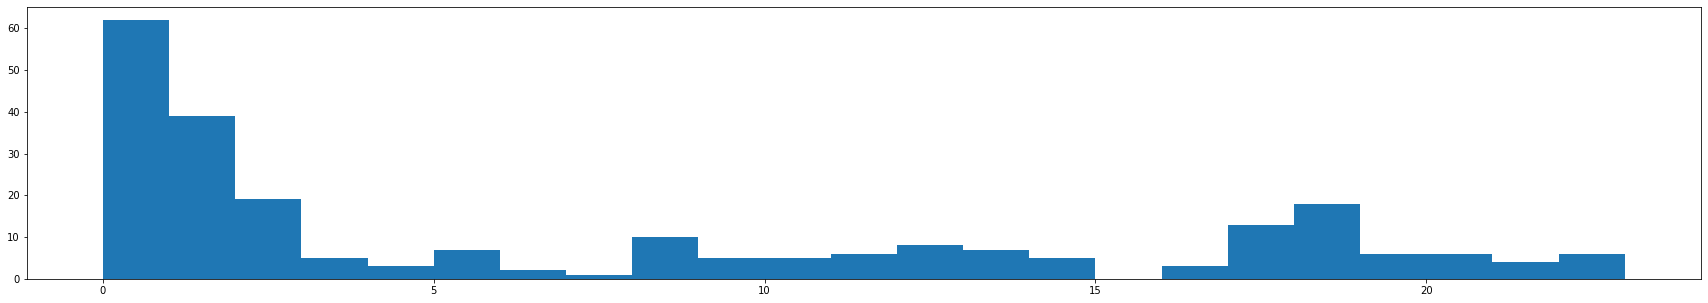

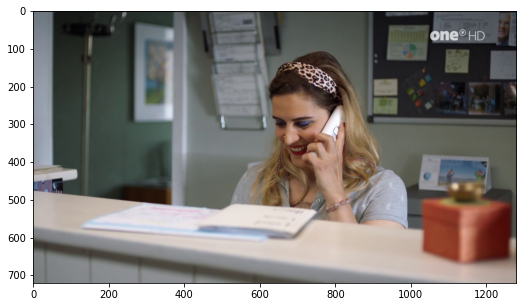

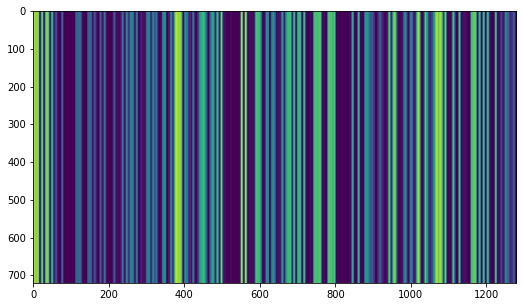

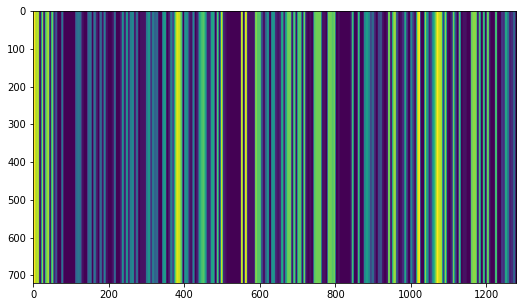

eb52071a508ad0dccfd93cd40143db175a1e3c024f98b89b37f8d07544b2
288 ####################################################################################################
eb52071a508ad0dccfd93cd40143db175a1e3c024f98b89b37f8d07544b2
289 ####################################################################################################
eb52071a708b4b80e7323ed40143db175a1e3c024fc8b89333f8d848af86
290 ####################################################################################################
eb52071a708b4b80e7323ed40143db175a1e3c024fc8b89333f8d848af86
291 ####################################################################################################
eb52071a900c26f054ce3cd401439b175a1e3c024e98b09337e87671a5aa
292 ####################################################################################################
eb52071a900c26f054ce3cd401439b175a1e3c024e98b09337e87671a5aa
293 ####################################################################################################
eb52

eb52071a10977ba67fdf09f741d25faa380c8f7a4e98b09337eceec39afd
372 ####################################################################################################
eb52071a10106386400509f741d25faa380c8f7a4e98b09337ecaac21884
373 ####################################################################################################
eb52071a1017ffbe04ff09f741d25faa380c8f7a4e98b09337ecfae3def6
374 ####################################################################################################
eb52071a10106106000109f741d25faa380c8f7a4e98b09337ec78c05a62
375 ####################################################################################################
eb52071a7010ffffc7b109f741d25faa380c8f7a4e98b09337edfefbdfff
376 ####################################################################################################
eb52071a10102ff7410109f741d25faa380c8f7a4e98b09337edf8605a47
377 ####################################################################################################
[[23

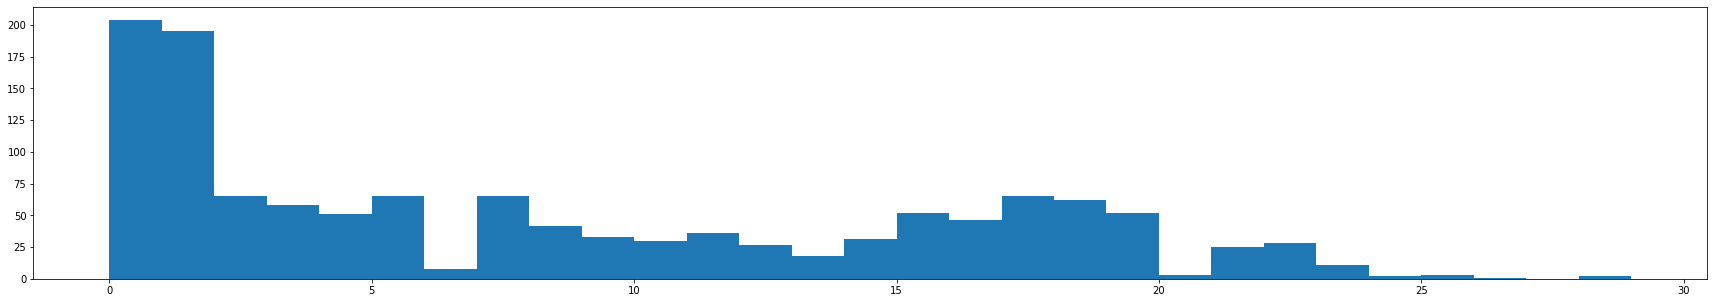

[[21 22 22  1 20  1 19 19  1 19  1 19  0  0 19  2  0  1  0  0  0  7  7  7
   1  1  0  7  7  1  7  1  7  2  3 11  0  1  0  0  0  0  0  9  9  5  7 12
   2  2 22  2  6  7  4  4 12  5 13  5  3 10 11 11  3 14  2  4  7 15 14 18
   5  7  3  7 10  0 25 14  1  0  1  0 10  2  1 10 10 11 16  4  0 15 21 15
   2 21  1  1  0  1  1 16 22 21  1 19  2  1 18  1  1 19  1 21 18 19 23 12
  13  1 12  1 12  1 10  0  0  1 13 14 17  1  1  0  0  0  0  0 17 18  1  0
  16  1  1  1 15 17 18 18  1 17 18 18 19  1 18  1  1 17  0  1 16 16 17  2
  16  1  0 15 15  1  1  0  7  1  7  8  1  1  1  1 18  2  3 20  3  1 18 18
   0  0 15 16  0 13 13 17 12  9  7  0  5  4  2  5  7 17 15  4 14  4  5 12
  21 21 15 18  7 22  7  2  3  7  3 17  5  3 12  1  1  4 22 20  9  5 16  4]]


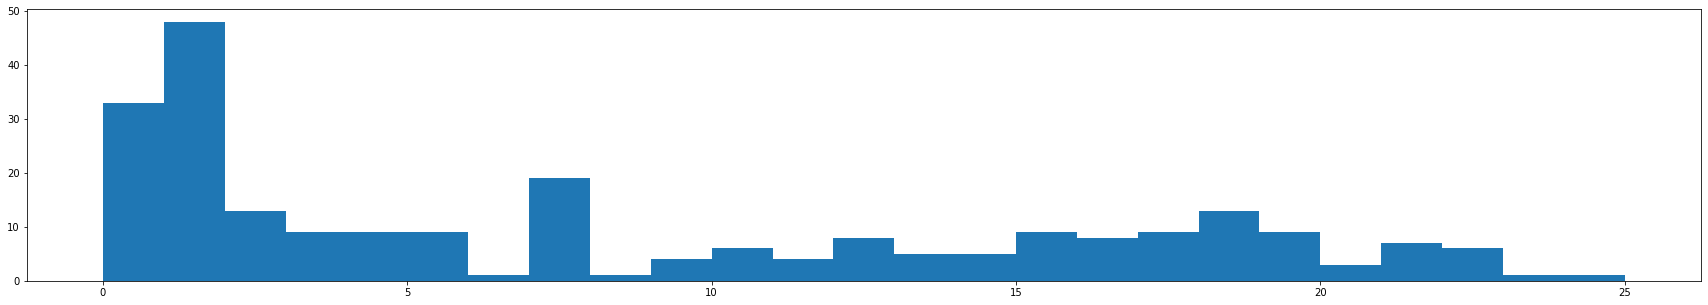

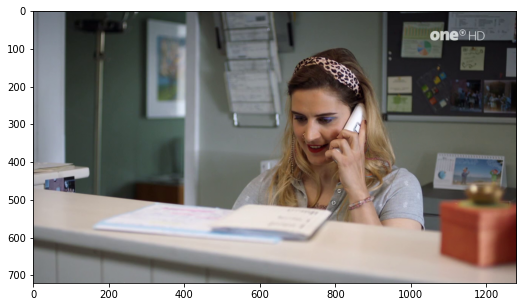

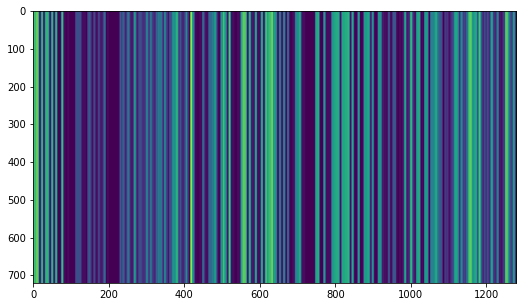

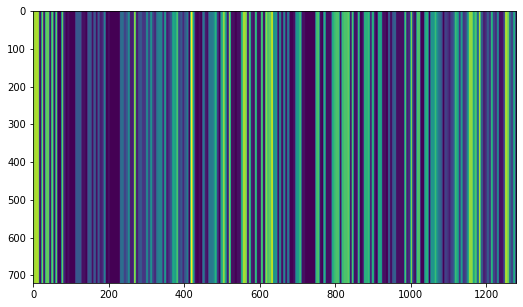

eb52071a901f2ff75fdb09f741d25faa380c8f7a4e98b09337edfffe5a7f
378 ####################################################################################################
eb52071a101020a2414a09e741d25faa380c8f7a4e98b09337ec61f01032
379 ####################################################################################################
fb52a71ef49bffffffff2df741de5fea380c8f7a4e98f09337ec6d88b787
379 ####################################################################################################
eb5200100012080e100000a341d25e8a380c8f7a4e98b09337ec6d08b787
380 ####################################################################################################
eb52071af09bbfff7eff09f741d25faa380c8f7a4e98b0bb37ecefb9ff87
381 ####################################################################################################
eb52071a90184843000009e741d25faa380c8f7a4e98b0b337ecc5293628
382 ####################################################################################################
eb52

ef521f3a30a5c9cbb4a756b28060126d9e3b5af24e98b09337e0d3dd3827
466 ####################################################################################################
ed6adf18d0a5898f8add76f28060126d9e3b5af24e98b09337e0fbe8d007
466 ####################################################################################################
ed6adf18d0a5898f8add76f28060126d9e3b5af24e98b09337e0fbe8d007
466 ####################################################################################################
e952819a702587ee8ab0d6b28060127d9e3b5af24e98b09337e0fbf3e00f
466 ####################################################################################################
e952819a702587ee8ab0d6b28060127d9e3b5af24e98b09337e0fbf3e00f
466 ####################################################################################################
eb56071a90250fb256cb56b28060127d9e3b5af24e98b09337e03964c81c
466 ####################################################################################################
eb56

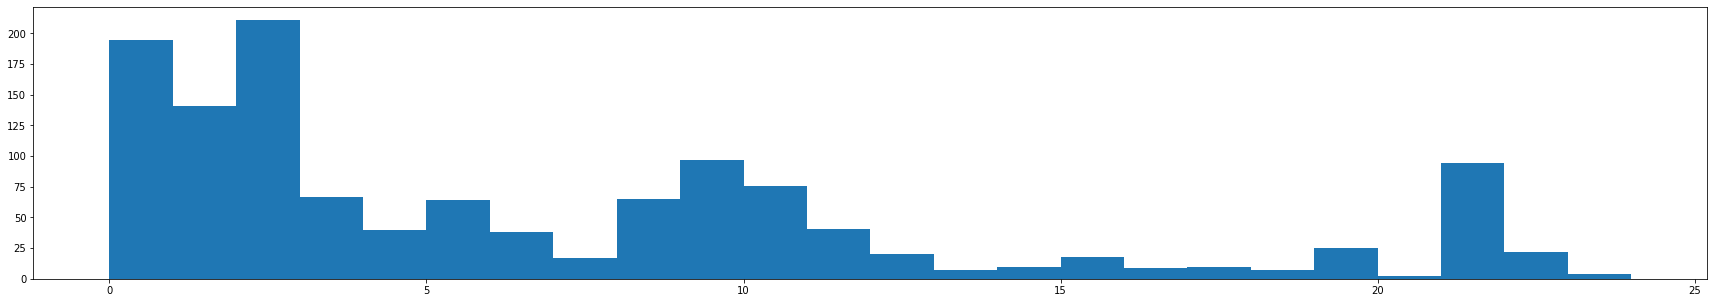

[[18 12 12 10 10  0 10  2  6  6  2  8  1  4  2  1  7  4  0  0  0  5  6  8
   1  1  0  9  9  0  9  0  8  8  1  0  0  1  9  0  0  0 10  1  5  3  1  0
   5  3  0  0  2  2  8 10  9 11  9  2  0  0  9 10  5  8  9  1 10  0  4  0
   9 10  6  2  8  0  0  0  0  8  1  8  0 10  9  1  9  0 10 10  1  0  9  0
  11  0  0  0  0  1  0  0  0 12 11  0  0  1  1  1  0  0  2 11  1  1 13  2
   0 14 17  2 16 20  1 15 21  2  2 22 21 21 21  2  2  2 21 22 21  2 20 21
   2 21  2 21 21  2 21  2 19 21 21 21  2  2 21  2  2 21  2  2 21 21 20  2
  19  2  2 21 20  2  2  2 19  2 18 19  2  1  0  0  9  2  3 15  3  2 11 11
   2  2 15 12  2 10 10 10 16 15 15  2  2  2  1  1  4  6  9 10  9  3  8  4
   5  4  6  5  9  8  0  4  1  4  4  1  4  5  8 10 10  6  1  2  3  8  9  9]]


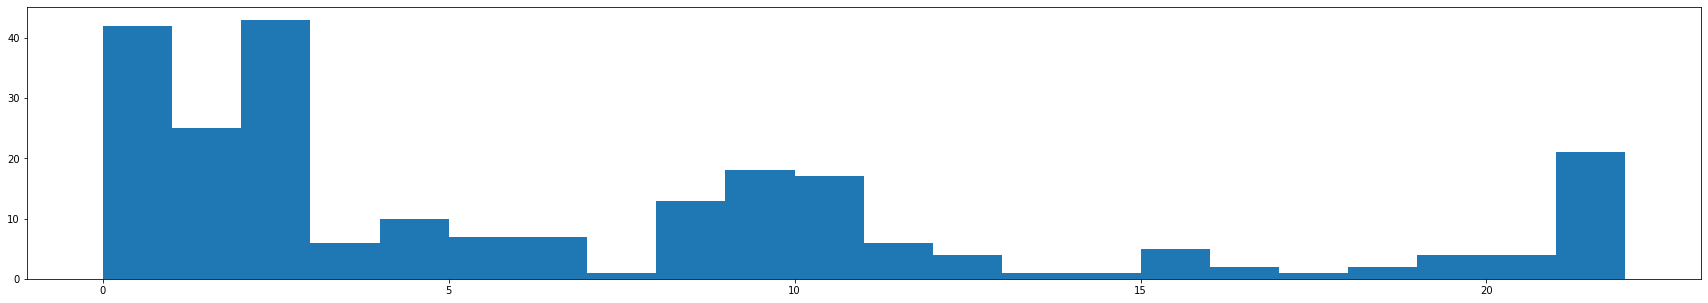

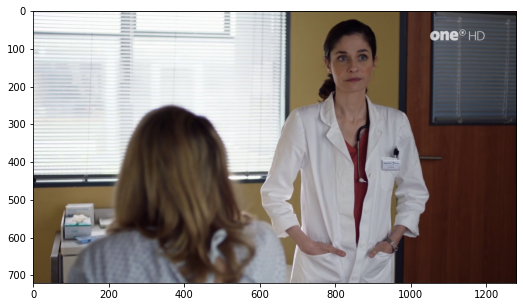

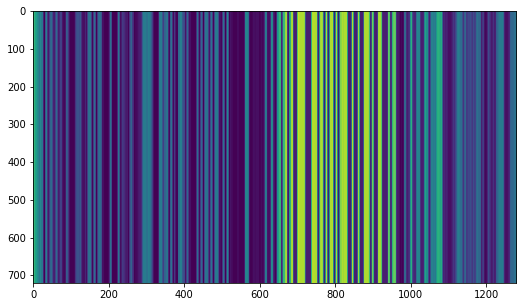

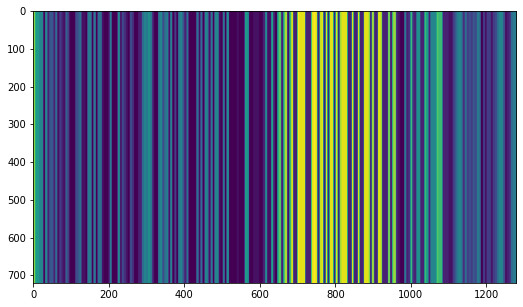

fad4c71ac22883e3eae856b28060126d9e3b5af24e98b09337e0fbfd6fc7
466 ####################################################################################################
fad4c71ac22883e3eae856b28060126d9e3b5af24e98b09337e0fbfd6fc7
466 ####################################################################################################
fb52879af2aacce7941456b28060126d9e3b5af24e98b09337e0ff3ee99f
466 ####################################################################################################
fb52879af2aacce7941456b28060126d9e3b5af24e98b09337e0ff3ee99f
466 ####################################################################################################
eb52071a10aace0f5de856b28060126d9e3b5af24e98b09337e0fa2eef1f
467 ####################################################################################################
eb52071a10aace0f5de856b28060126d9e3b5af24e98b09337e0fa2eef1f
468 ####################################################################################################
e952

eb52071a70840a3dac0127844e07236281f8eeda4e98b0933798d3c9103f
546 ####################################################################################################
eb52071a9005916180fa27844e07236281f8eeda4e98b09337985e579846
547 ####################################################################################################
eb52071a9005916180fa27844e07236281f8eeda4e98b09337985e579846
548 ####################################################################################################
eb52071ab086a7d9d90c27844e07236281f8eeda4e98b0933798522b7cf3
549 ####################################################################################################
eb52071ab086a7d9d90c27844e07236281f8eeda4e98b0933798522b7cf3
550 ####################################################################################################
eb52071ad0073c85f5f727844e07236281f8eeda4e98b09337989058b445
551 ####################################################################################################
eb52

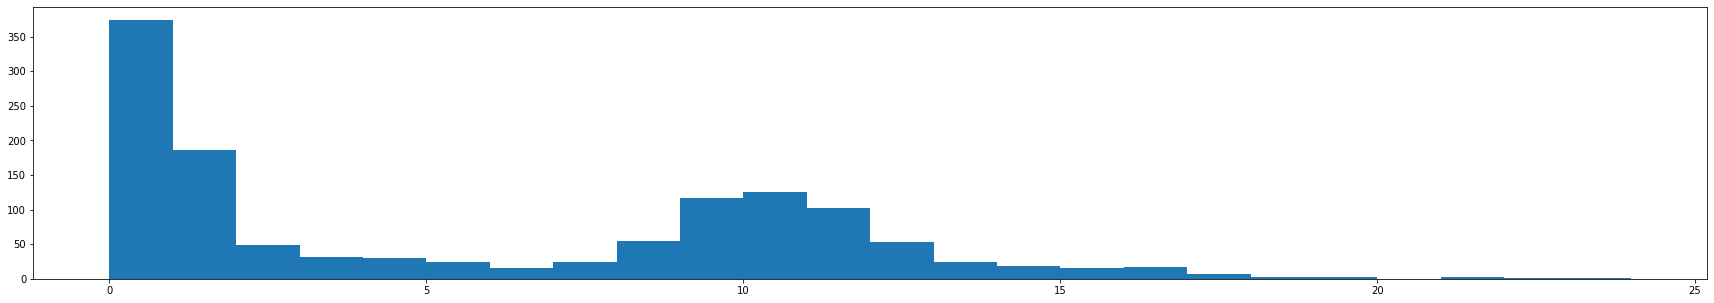

[[11 11 11  0 10  0  9  9  0  9  1 10  0  1 10  2  0  0  0  1  0 11 12 12
   0  0  0 12 12  0  9  0  8  1  2 10  1  0  0  1  6  0  1  1 14  1 10  1
   9  8  0  9  1  0  0  1 11  9  4 11  8  8  0  3 12  4  0  0 10  0  8  8
   7  9  1 11  9  0  0 10  0  0 10  0  1 10  9  9  9  0  0  0  0 11  1  1
   1 10  0  0  8  9 10  1  0  1  1  0  0  7 10  9  1  0  9  1  0  0  9  9
   0  9 10  0  0  0 10  1 12  0  0  0  1  0  0 10 10 11 11 12 11  0  1  0
  10 11 10  0 10 11  9  3 13 11  1 12  9  0 10  0  1 22  0  1 16 16 17  0
  15  0  0 16 16  1  0  0 14  0 14 13  1  2  0  1 18  0  1 17  0  1 11  9
   0  1 10 12  0 14 12 14 14  1  1 15 12  1  1  1 10  0  0 12  6  8  2 10
   0  5  1 11 11 10  0  3  1  0  9 10  9 11  8  1  3 11  1  9  0 12  1  9]]


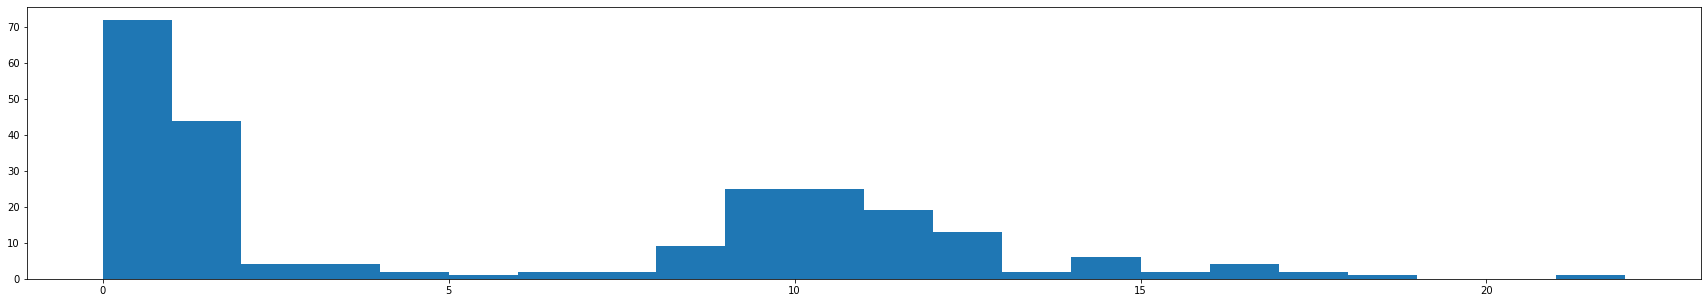

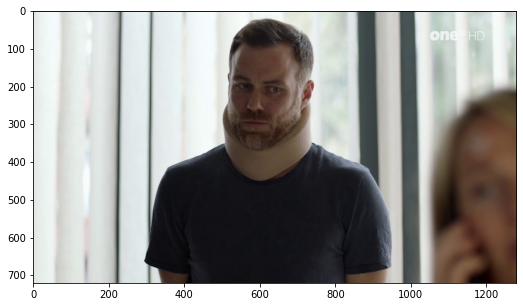

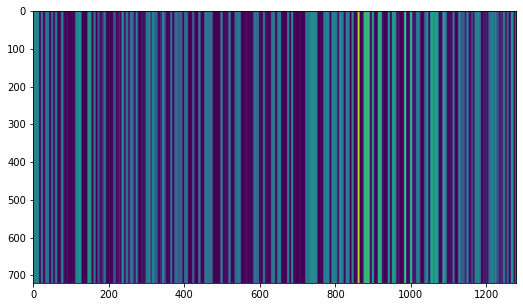

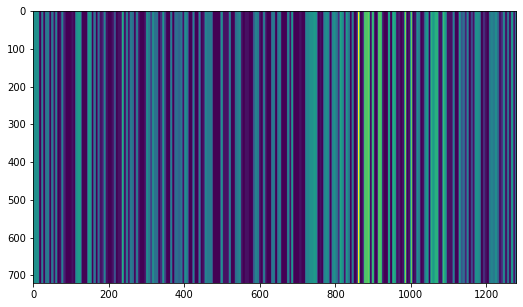

eb52071a908ad0fccbd927844e07236281f8eeda4e98b09337989d5c3e55
555 ####################################################################################################
eb52071a908ad0fccbd927844e07236281f8eeda4e98b09337989d5c3e55
556 ####################################################################################################
eb52071a300b4ba0e72227844e07236281f8eeda4e98b09337989521d524
557 ####################################################################################################
eb52071a300b4ba0e72227844e07236281f8eeda4e98b09337989521d524
558 ####################################################################################################
eb52071af01c26f054ce27844e07236281f8eeda4e98b0933798bcf59ec2
559 ####################################################################################################
eb52071af01c26f054ce27844e07236281f8eeda4e98b0933798bcf59ec2
560 ####################################################################################################
eb52

eb52071a709093369b7e12b70e97e7dfe3ea5da24e98b093379c46ee9e17
633 ####################################################################################################
eb52071a709093369b7e12b70e97e7dfe3ea5da24e98b093379c46ee9e17
634 ####################################################################################################
eb52071a90923ef4ee7312b70e97e7dfe3ea5da24e98b093379c4d9b601a
635 ####################################################################################################
eb52071a90923ef4ee7312b70e97e7dfe3ea5da24e98b093379c4d9b601a
636 ####################################################################################################
eb52071ab013b59ac28812b70e97e7dfe3ea5da24e98b093379c45ee8b6b
637 ####################################################################################################
eb52071ab013b59ac28812b70e97e7dfe3ea5da24e98b093379c45ee8b6b
638 ####################################################################################################
eb52

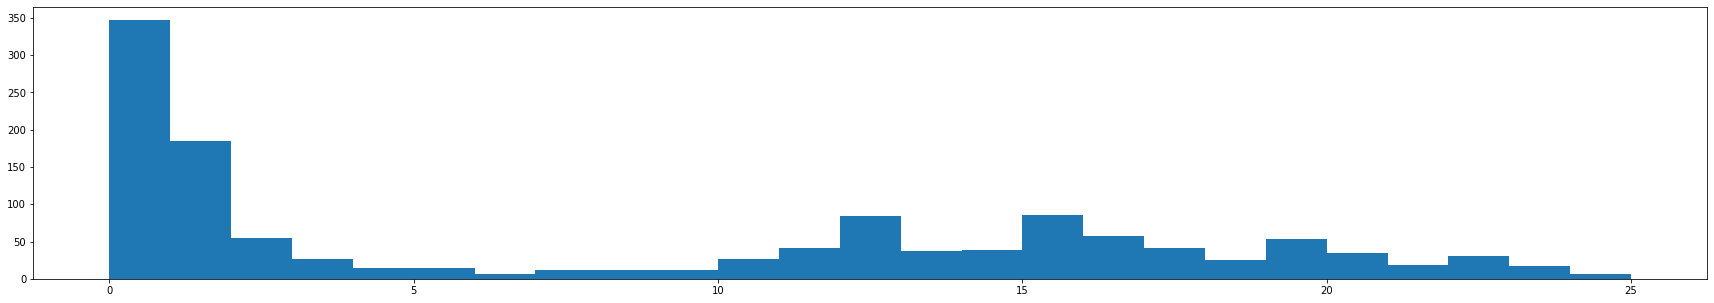

[[12 12 13  0 10  0 12 12  0 14  0 15  0  0 16  0  2  0  0  1  1 18 17 16
   0  0  0 15 16  0 16  1  1 17  1 17  0  0  0  1 17  0  0 18 17  0  2 22
   0  2 20  2  0 17  1  1 15  1 14  2  0  2 13 11  1 15  1  1 12 16 13 15
   0 13  0  1 14  1 15  1  0  0  0 13  0  0 12  0 12  0 15 14  1 12 13 15
   0  0  0  0 13 15 14  1 12  1  1 15  0 13 15  3 14 12 12  1  2 16 11 10
  15 11  2 17 10 15 19 20 19 23 22  0  0  0 21 19 19 19 21  0 19  1 19  0
   1 21  1 19 21 22  0 20 20  0 20  0  0  1 19  0  1 21  0  1 21 22 21  2
  22  0  1 24 23  1  0  0 20  0 18 24  0  0  1  0 19  0  2 17  2  1 16 18
   1  1 16 17  0 14 15 16 15  1  0 14 14 15  1  1  1  1 16  2  1  1 13 12
   0 11 14 16  1  0  0  2  0 15 12  2 11  1  0 12  2  2  1 12 11  1 12  0]]


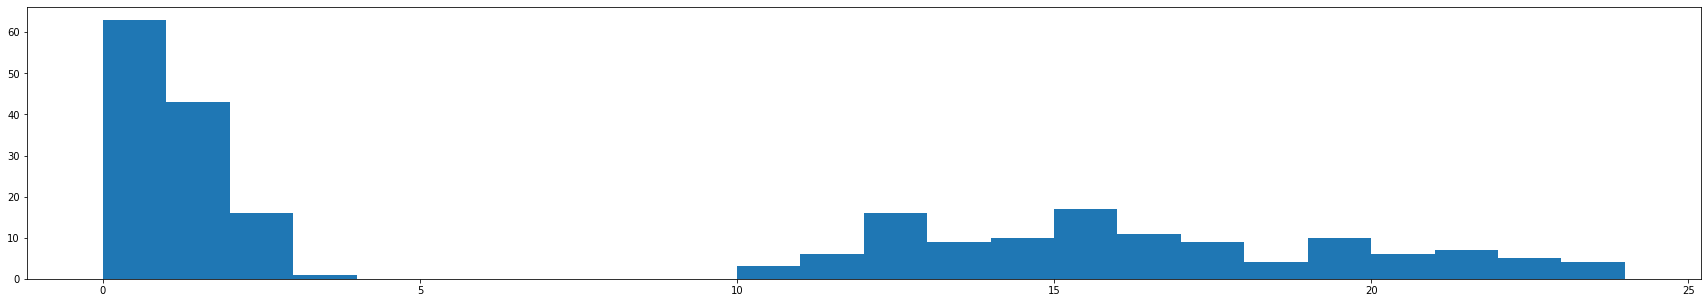

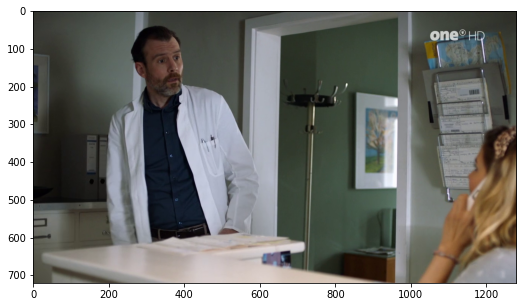

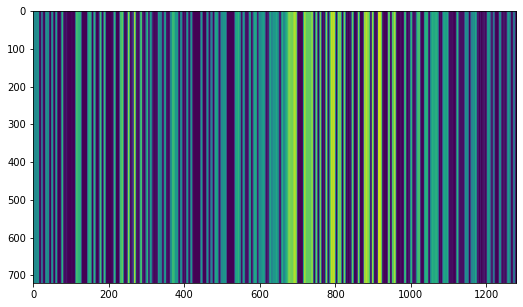

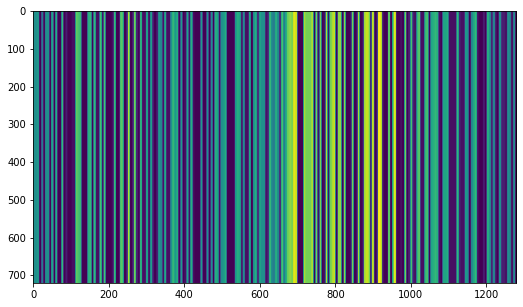

eb52071a509924a34f4a12b70e96e7dfe3ea5da24e98b093379c2370691a
647 ####################################################################################################
eb52071a509924a34f4a12b70e96e7dfe3ea5da24e98b093379c2370691a
648 ####################################################################################################
eb52071a701a123b16bc12b70e96f7ffe3ea5da24e98b093379c2f0cacaf
649 ####################################################################################################
eb52071a701a123b16bc12b70e96f7ffe3ea5da24e98b093379c2f0cacaf
650 ####################################################################################################
eb52071a909b89573a4712b70e96e7dfe3ea5da24e98b093379ca29325d6
651 ####################################################################################################
eb52071a909b89573a4712b70e96e7dfe3ea5da24e98b093379ca29325d6
652 ####################################################################################################
eb52

fb56071a909e49d3fce66de3cf6aaa1845ddc82a8e98b0937f90120b48e7
700 ####################################################################################################
fb56071a909e49d3fce66de3cf6aaa1845ddc82a8e98b0937f90120b48e7
700 ####################################################################################################
ffd8071ab01fd28fd05da5faef74aa1c45dfc82d1f98b095b7901a36a396
700 ####################################################################################################
ffd8071ab01fd28fd05da5faef74aa1c45dfc82d1f98b095b7901a36a396
700 ####################################################################################################
ebd0071ad0a1d47affd54fe2cf36aa1845dfa82a1e98b097379053eabf3f
700 ####################################################################################################
ebd0071ad0a1d47affd54fe2cf36aa1845dfa82a1e98b097379053eabf3f
700 ####################################################################################################
eb52

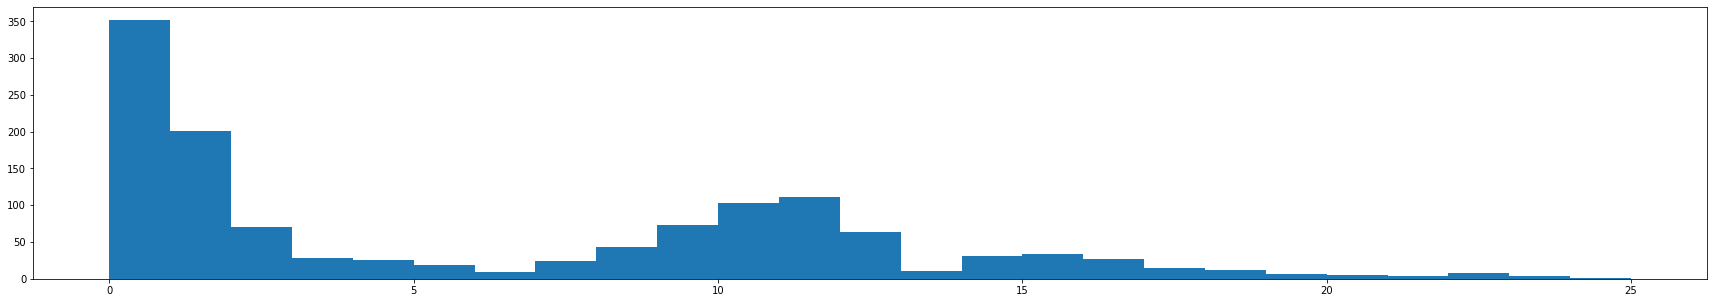

[[12 12 13  1 11  1 10 11  0  9  0  9  1  1 11  0  0  0  0  1  1 12 22 17
   1  1  1  8  9  1  8  1  7  2  2  8  2  3  2  1  9  2  9  1  8  1  0  0
   0 10 10  0  3  0 13 20 18 11 13  2 15  2 16 11  7  0 11  3 16  0  1  0
  10 15  8  1  2 12  0 11  0 12  0  0 11 13  0 10 11  9  9  0  0  1 15  0
  13 10  0  0 12 11 12 14  1  0 12  1  0 11  0  0 12  0 12  1 10  0  8  0
   0  0  1 11 12  0  0  0  0  7  0  0  1 14  0  9 10 12  1 10 11 11  1  7
  10  1  0  0 10  1  1  1  0  0 11  0  9  1 10  0  1 10  1  1 11 10 10  0
   9  1  0 11 11  0  1  1 11  0 10 10  0  0  0  0 13  1  0  9  0  0 11 10
   0  1 21 21  1 19 16 19 22  1  0 16  0  0  1  0  2 17 16 14  0 12 15  0
  16  1 10  1  3 13  0 14 15 17 10 14 12  1  3 15  4  1  9  9  0 14  2  1]]


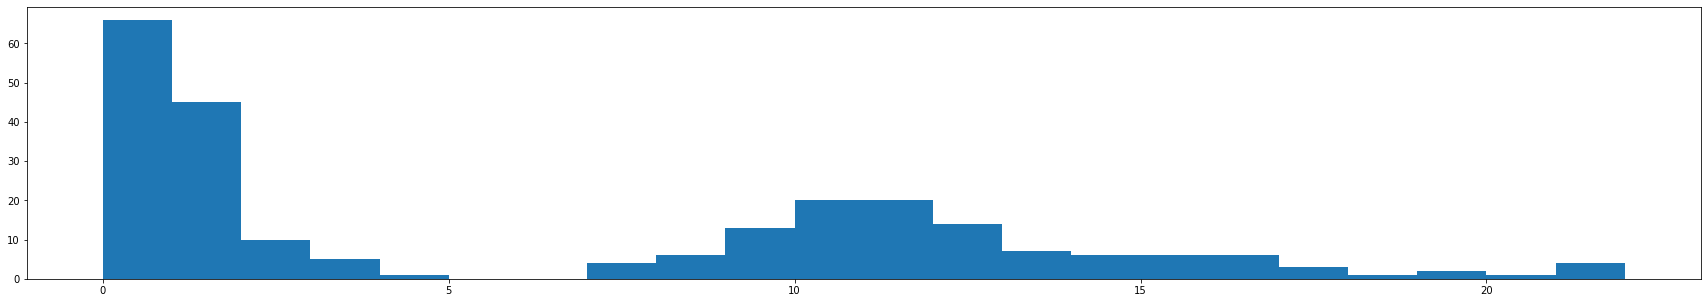

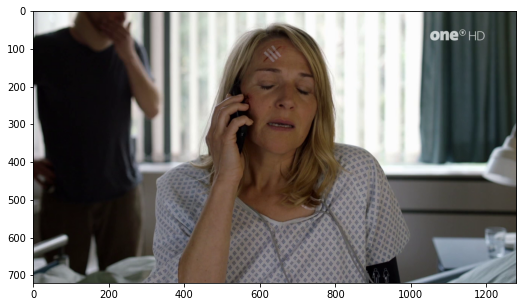

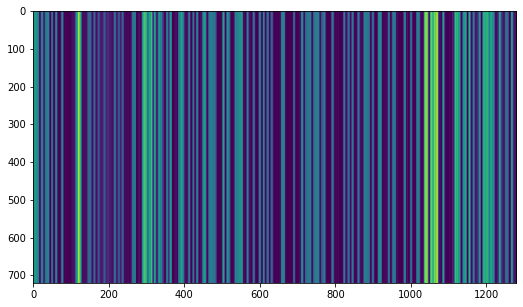

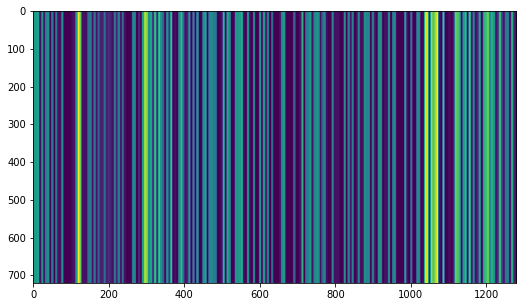

eb52071a90a863eba8e54de2cf24aa1845dd882a4e98b093379076a5f9b4
711 ####################################################################################################
eb52071a90a863eba8e54de2cf24aa1845dd882a4e98b093379076a5f9b4
712 ####################################################################################################
eb52071a90a9fbe7ac1f4de2cf24aa1845dd882a4e98b09337907e9a1715
713 ####################################################################################################
eb52071a90a9fbe7ac1f4de2cf24aa1845dd882a4e98b09337907e9a1715
714 ####################################################################################################
eb52073ed0bacf0fbded4de2cf24aa1845dd882a4e98b0933790f8aad537
715 ####################################################################################################
eb52073ed0bacf0fbded4de2cf24aa1845dd882a4e98b0933790f8aad537
716 ####################################################################################################
eb52

ff720f1a1083674d5fedf3494c40319709b2233a4e98b0933788320704ae
769 ####################################################################################################
eb52071a30840a3dac01f3494c40319709b2233a4e98b0933788599d6ccf
770 ####################################################################################################
eb52071a30840a3dac01f3494c40319709b2233a4e98b0933788599d6ccf
771 ####################################################################################################
ef52071a7005917d909af3494c40319709b2233a4e98b09337889beea479
771 ####################################################################################################
ef52071a7005917d909af3494c40319709b2233a4e98b09337889beea479
771 ####################################################################################################
eb52071a7086e7dd990cf3494c40319709b2233a4e98b0933788979241cc
772 ####################################################################################################
eb52

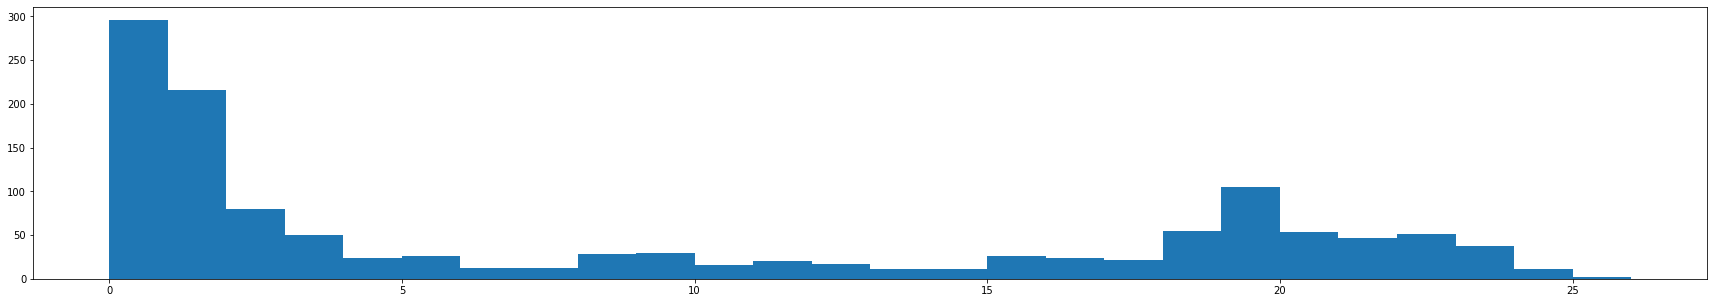

[[20  8  3  1 21  1 23 24  1 20  1 23  1  1 21  0  0  0  0  0  1 22 22 20
   0  0  1 21 19  0 22  1 19 19  1 22  1  0  0  0 18  1  0  1 22  0 20  0
  20 20  0 20  1  1  0  1 19 13  4 13 11 20  2  2  2  9  2  0  2  0  9  8
   2  4  5 19 14  0  4 21 21 23 20 19  0  3 21 19  0 23  1  1 22  0  3 23
   8  3  2  1 21 20  0  1  1 16  1  1  2  1  0  0  0  3 22 17  1  1  1 20
  22  2  1 16  3 19 20 18  3  1  1  7 11  1  3 21 19  0 17 19  0  2 22  1
   2  3 22  0  2  1  8  1  1  2 19 19 19  1 18  1  1 18  2  0 20 19 19  0
  19  0  0 20 20  1  1  1 18  3 18  6  0  0  0  1 23  1  1 19  0  0 23 21
   0  1 21 20  0 19 20 19 18  0  0  0 19  0  0  0  0 18  1 19 19  1  1  4
  19  2 18  0  0 16  2 15  0  1  1  2  0  1 18 18  2 16 15  3 16  1 16  1]]


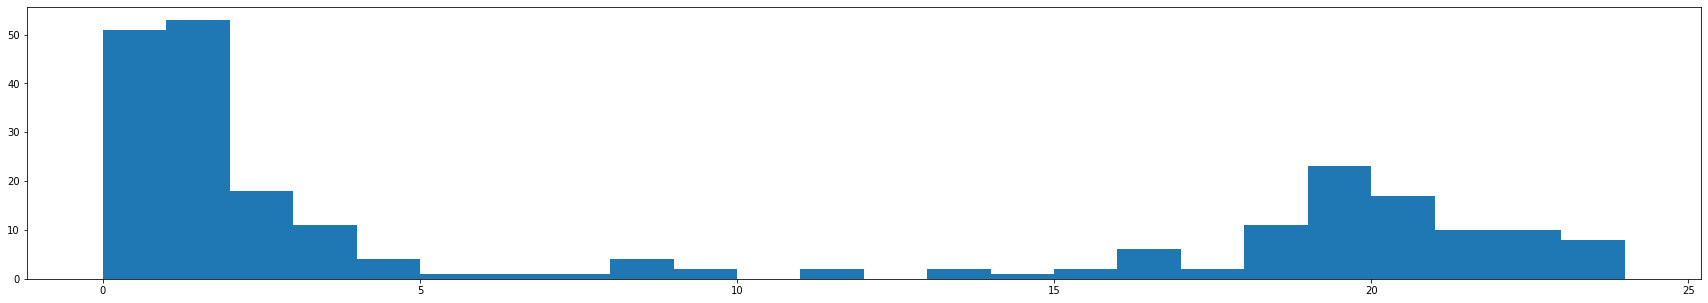

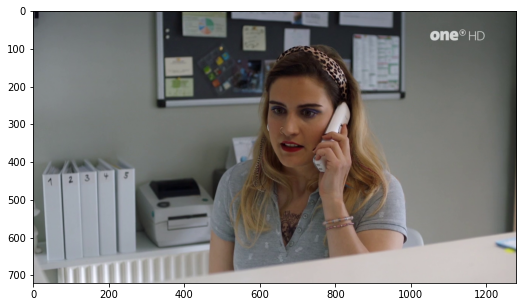

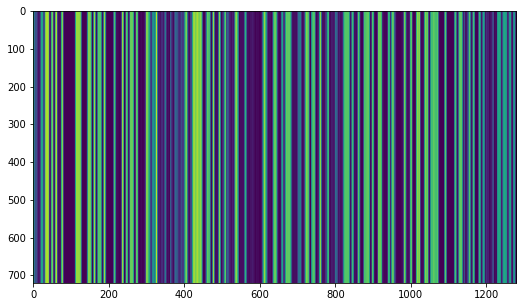

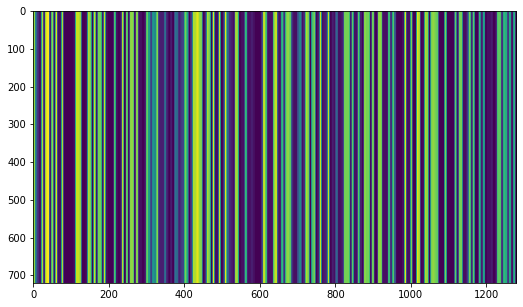

cb52071ad08ad0fc437bf3498c40319719b2223a4e98b093378859a5036a
773 ####################################################################################################
cb52071ad08ad0fc437bf3498c40319719b2223a4e98b093378859a5036a
773 ####################################################################################################
cb52071af00b4ba4632af3494c40319f0bb2633a4e98b09337885298e81b
773 ####################################################################################################
cb52071af00b4ba4632af3494c40319f0bb2633a4e98b09337885298e81b
773 ####################################################################################################
4b52071a100c26fd504ef349cc4031970bb2673a4e98f1933788bea1e272
773 ####################################################################################################
4b52071a100c26fd504ef349cc4031970bb2673a4e98f1933788bea1e272
773 ####################################################################################################
2b52

eb52071ab09553a65d9fc67a0cd1f52a6ba090424e99b093378c661b575c
858 ####################################################################################################
eb52071ab09553a65d9fc67a0cd1f52a6ba090424e99b093378c661b575c
859 ####################################################################################################
eb52071ad01665fe0769c67a0cd1f52a6ba090424e98b093378ca021913e
860 ####################################################################################################
eb52071ad01665fe0769c67a0cd1f52a6ba090424e98b093378ca021913e
861 ####################################################################################################
eb52071af018bfff63b1c67a0cd1f52a6ba090424e98b093378c24ba9c93
862 ####################################################################################################
eb52071af018bfff63b1c67a0cd1f52a6ba090424e98b093378c24ba9c93
863 ####################################################################################################
[[11

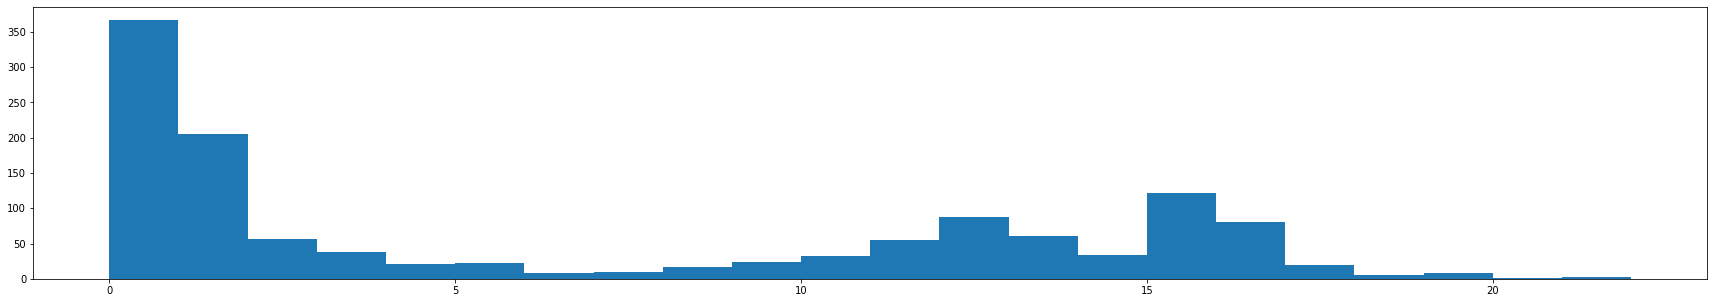

[[11 12 12  1 12  0 13 12  0 12  2 12  0  2 13  1  0  1  0  0  0 12 14 15
   0  0  0 16 16  1 16  1  1  0  5 18  0  1  0  0 15  0  0 17 17  0  1 12
   1  3 18  2  4 18  2  0 16  4 12  2  3  1 11 13  0 12  0  2 12 14 11 16
   0 13  2  8 13  0 12  0 13 12  0  0  1 14 15  0  1 13 15 15 15  0 15  1
   1  1  0  1 13 12  0  0 13 13  1 15  1  1  0 15 16 16 16 16  1 15  1 13
   0  0 16  1 15  1 12  1  1 14 15  1 15  0 15 15 14  0 15  0  0  0  0  1
  13  1  0 14  1  0  2  1  0 15  0  1  0  1 16  0  0 16  0  1 13 15 13  0
  14  1  0 14  9  0  1  1 12  1 10 12  0  1  1  1 19  1  0 21  1  0 14 12
   1  0 16 16  2 16 16 16 15  0  1  0 15 14  1  1 13  0 12  6  8  0  0 12
   0  6 11  1  3 11  0  1  1  0  0 11  0  6  2  7  9  9 12  0 12  0 13  3]]


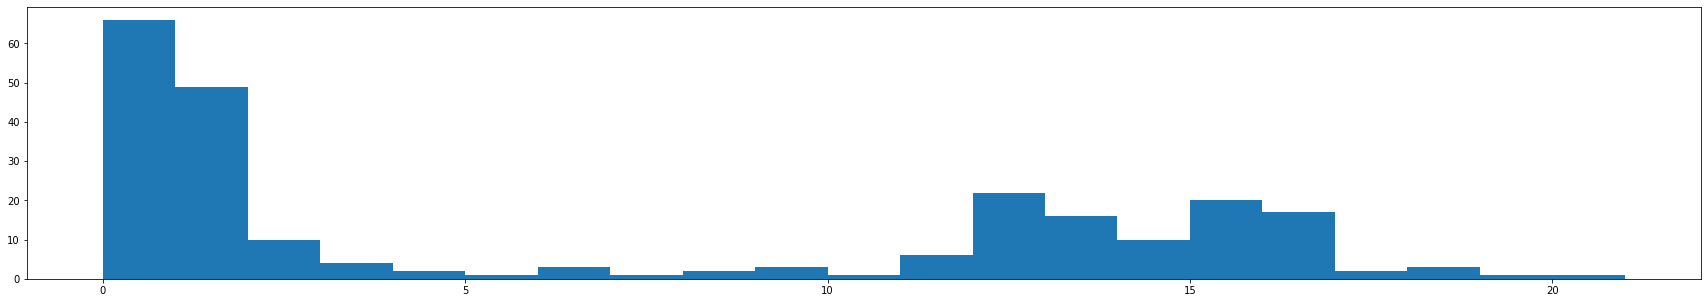

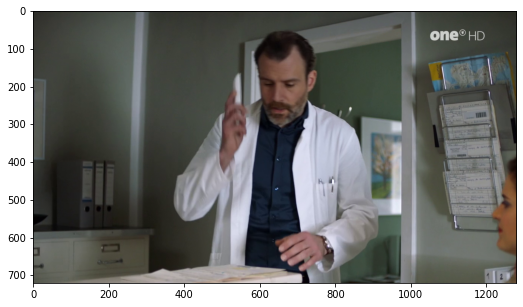

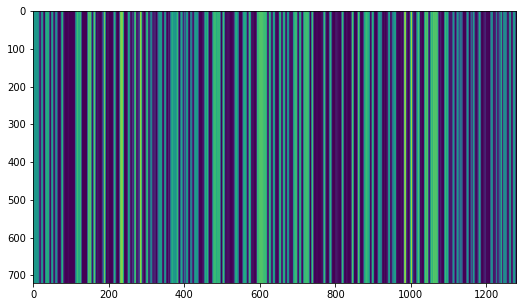

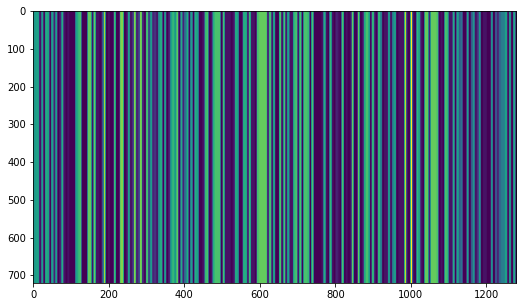

eb52071a30992ce34f5ac67a0cd1f52a6ba090424e98b093378cb96415ea
864 ####################################################################################################


In [28]:
width = 1280
height = 720
cap = cv.VideoCapture('video.ts')

i = 0
eb52_count = 0
while cap.isOpened() and i < 1000:
    i+=1
    ret, frame = cap.read()
    if ret:
        # drop all but the first component of YCR_CB colorspace to only keep luma
        first_row_luma = cv.cvtColor(frame, cv.COLOR_BGR2YCR_CB)[0, :, 0][None]
        # 30 bytes of data
        resized = cv.resize(first_row_luma, (30 * 8, 1), interpolation=cv.INTER_LINEAR)

        if i % 100 == 0:
            resized_back_orig = cv.resize(resized, (width, 1), interpolation=cv.INTER_NEAREST)

            plt.rcParams["figure.figsize"] = (30,5)
            np.set_printoptions(threshold=np.inf)
            print(first_row_luma)
            show_bins(first_row_luma)
            
            print(resized)
            show_bins(resized)

            imshow_luma = np.repeat(first_row_luma, height, axis=0)
            imshow_resized_back_luma = np.repeat(resized_back_orig, height, axis=0)
            
            plt.imshow(cv.cvtColor(frame, cv.COLOR_BGR2RGB))
            plt.show()
            
            plt.imshow(imshow_luma)
            plt.show()
            plt.imshow(imshow_resized_back_luma)
            plt.show()
            
        #threshold = resized.max() - ((resized.max() - resized.min()) / 2)
        threshold = 3
        recognized_hex_string = np.packbits(resized > threshold).tobytes().hex()
        print(recognized_hex_string)
        if recognized_hex_string.startswith("eb52"):
            eb52_count+=1
        print(eb52_count, "#" * 100)